# Innholdsliste

### Kapittel 1 - Turistskatt i Norge

### Kapittel 2 - Turistnæringen i Norge

### Kapittel 3 - Samfunnsøkonomiske effekter av en turistskatt

### Kapittel 4 - Konklusjon

### Kildeliste









<p>&nbsp;</p>





### Kapittel 1 - Turistskatt

1.1 - Hva er turistskatt og hva menes med en turistskatt på overnattinger?

1.2 - Hva er begrunnelsen for dens innføring?

1.3 - Hvor utbredt er dette tiltaket i andre land/byer?

1.4 - Hvordan opererer man med de forskjellige turistskattene?

<p>&nbsp;</p>

##### Kapittel 1.1 - Hva er turistskatt og hva menes med en turistskatt på overnattinger?

En turistskatt er en avgift som skal bidra til å finansiere fellesgodene i reiselivet. Et fellesgode kan ikke gjøres eksklusivt for den som betaler for det. Eksempel på fellesgoder er offentlige toaletter, skiløyper og merkede stier. Turistskatt er et bestemt beløp eller en prosentandel som legges på som en ekstrakostnad på overnatting, eventuelt også andre reiselivstjenester. [NHO Reiseliv u.å.]

En turistskatt lagt på hotell blir som en ekstra overnattingsmoms som gjør det enda dyrere å bo på hotell. Turistskatt er spesifikt knyttet til turisme og kan være en obligatorisk avgift som blir pålagt av de lokale myndighetene. 

##### Kapittel 1.2 - Hva er begrunnelsen for dens innføring?

Begrunnelsen for innføring av turistskatt varierer fra hvor man er, men har som et ønske å finansiere turistinfrastrukturen og offentlige tjenester som en hver kan benytte seg av. For noen handler det om å prøve å dempe antallet turister og forhindre overturisme. For andre er det nesten som en bærekraftsskatt på hver besøkende. Pengene fra disse skattene går til å opprettholde reiselivsfasiliteter og beskytte naturressurser. [NHO Reiseliv u.å.]

##### Kapittel 1.3 - Hvor utbredt er dette tiltaket i andre land/byer?

Turistskatt er veldig utbredt rundt om i verden. Noen land krever engangsskatt ved ankomst, per dag du oppholder deg i landet, eller ved avreise. Når du har reist utenlands, har du sannsynligvis betalt en eller annen form for turistavgift. Avgiftene er oftest lagt inn i reisebillett eller avgifter du betaler via hotellregningen din. [NHO Reiseliv u.å.]

I 2022 ble det implementert en turistskatt i EU. Innen utgangen av 2022 vil ikke-EU-borgere, inkludert amerikanere, australiere, briter og andre reisende fra utenfor Schengen-sonen, måtte fylle ut en søknad for å komme inn. De under 18 eller over 70 vil ikke måtte betale gebyret. Dette er alle land hvor du allerede må betale turistavgift for å komme inn. 

Turistskatten avhenger av hvilket land du reiser til og hvilken by du oppholder deg i.

##### Kapittel 1.4 - Hvordan opererer man med de forskjellige turistskattene?

Erfaringer ved turistskatt er ulik fra hvor du oppholder deg. Noen plasser bruker en enkeltbetaling ved en flyreise, mens andre har turistskatt for hver natt du oppholder deg på hotellet. Her er noen eksempler på hvordan turistskatt man har. [Reiseliv (2022, 15. juli)]

**Svalbard** har en avgift på 150 kroner per person som legges på alle flybilletter, cruisebåtbilletter eller andre befordringsmidler ut fra svalbard. I vedtektene står det blant annet at pengene skal brukes til tiltak for å beskytte naturmiljø og kulturminner på øygruppen. 

**Amsterdam** er en by som sliter med å håndtere den store pågangen av turister. Byen som allerede krever inn en 7 prosents turistskatt på hotellregninger har nå også vedtatt en ekstraskatt som innebærer at hotellgjester må betale 3 euro per natt. Pengene skal gå til å vedlikeholde broer, kanaler, parker og gater.

**Venezia** har innført en turistskatt som reguleres etter lav- og høysesong. Skatten vil gjelde dem som drar på dagstur til sentrum av Venezia, og de må betale mellom 3 og 10 euro avhengig av hvor folksomt det er den aktuelle dagen. Dersom du skal oppholde deg lenger betaler du turistskatt for oppholdet. De har også to prissystem, ett for de fastboende og ett for turister. En turist må for eksempel betale fem ganger så mye som en fastboende for å ta en vannbuss.

**Bhutan** har en skyhøy turistskatt i sammenligning med andre plasser. Minste daglige avgift for de fleste utlendinger er 228 euro per person per dag i høysesongen og litt mindre i lavsesong. Men det dekker mye, inkludert overnatting, transport i landet, en guide, mat og inngangsavgifter.

**Hellas** har en turistskatt som er basert på antall hotellstjerner eller antall rom du leier. Det kan være alt opp til 4 euro per rom. Den ble innført av det greske turistdepartementet for å bidra til å kutte landets gjeld.

<p>&nbsp;</p>

### Kapittel 2 - Turistnæringen i Norge

2.1 - Hvordan har antall hotellovernattinger utviklet seg over tid?

2.2 - Når på året kommer turister?

2.3 - Hva er fordelingen av turister som ankommer via skip (cruise) og med fly, evt andre fremkomstmidler?

2.4 - Hvordan er hotelløkonomien?




<p>&nbsp;</p>

##### Kapittel 2.1 - Hvordan har antall hotellovernattinger utviklet seg over tid?


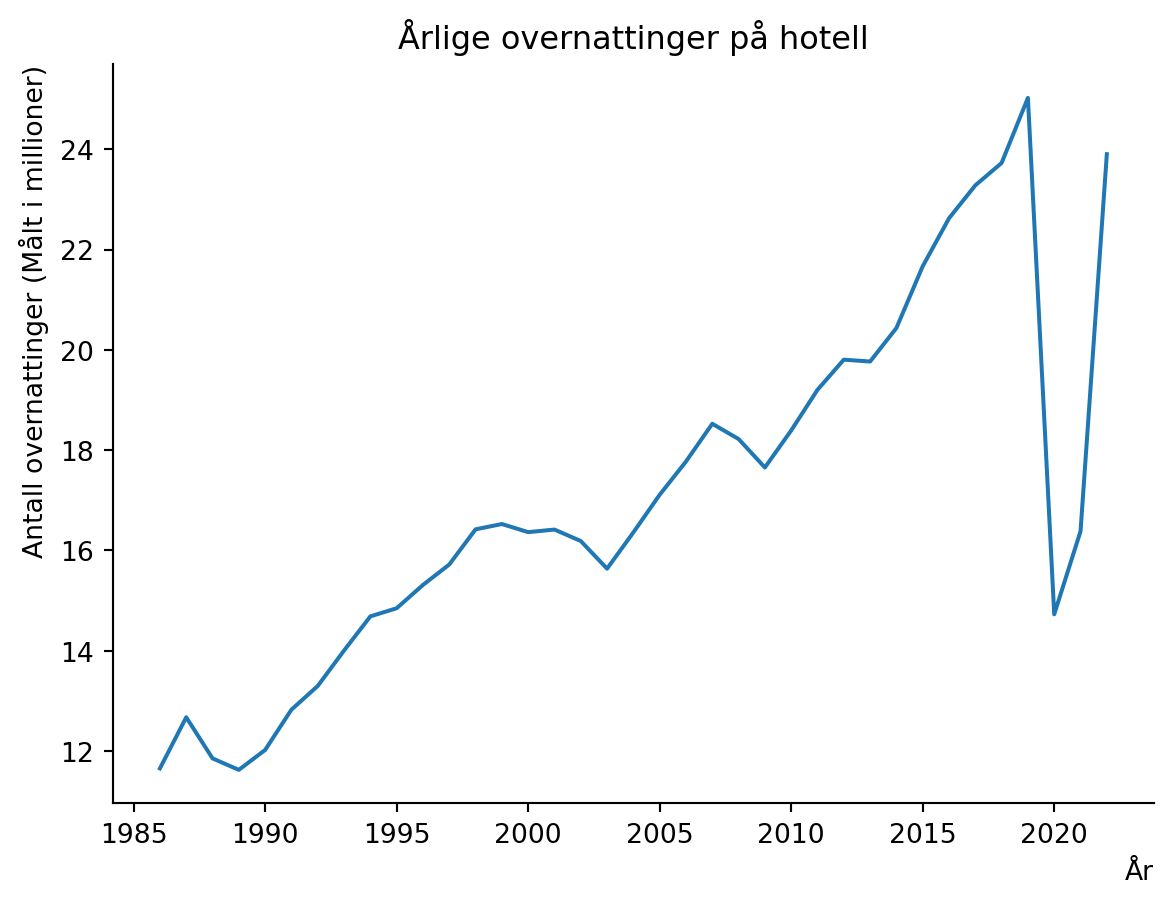

In [1]:
from matplotlib import pyplot as plt

import pandas as pd

import json

import requests

from pyjstat import pyjstat

import datetime

import seaborn as sns

import numpy as np

import sympy as sp

#Henter URL
postUrl = "https://data.ssb.no/api/v0/no/table/08403/" 

#Query
apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Landet",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "HotellFormal",
      "selection": {
        "filter": "item",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Overnattinger"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}
  
#Gjør query om til et datasett
def apiToDataframe(postUrl, query): 
  res = requests.post(postUrl, json=query)
  ds = pyjstat.Dataset.read(res.text)
  df = ds.write('dataframe')
  df_id = ds.write('dataframe', naming='id')
  return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)


#Splitter måned om til to variabler for år og måned
df[['year', 'month']] = df['måned'].str.split('M', expand=True)

#Endrer navn på dataframe
df_yearly = df

#Grupperer for år og summerer verdiene
df_yearly = df_yearly.groupby(df_yearly['year']).agg({'value':'sum'})

#Resetter posisjonen til indeksen
df_yearly = df_yearly.reset_index()

#Gjør om til numerisk verdi
df_yearly['year'] = pd.to_numeric(df_yearly['year'])

#Separerer ut alle verdier for 2023
df_yearly = df_yearly[df_yearly['year'] != 2023]

#Lager graf
def create_ax():
  fig, ax = plt.subplots()
  ax.set_ylabel('Antall overnattinger (Målt i millioner)', loc='top')
  ax.set_xlabel('År', loc='right')
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

  return fig, ax

#Plotter graf
fig, ax = create_ax()
plt.xticks()
plt.ticklabel_format(style = 'plain')
plt.title('Årlige overnattinger på hotell', color='black')
ax.plot(df_yearly["year"], df_yearly["value"]/1000000, label= "månedsbasert endring")
plt.show()

Her ser vi hvordan antall hotellovernattinger har utviklet seg fra perioden 1985-2022. Selv om det har vært en del svingninger under denne perioden ser man klart at det hele tiden har trendet oppover med hvor mange som overnatter på hotell i Norge. Foruntenom starten av 2020, da korona pandemien inntraff. Karantener, hjemmekontor og restriksjoner ble den nye hverdagen og gjorde det vanskelig for reiselivet. Hotellbransjen ble hardt rammet, der mange måtte stenge midlertidig eller redusere driften på grunn av reiserestriksjoner, liten etterspørsel på reiser og mange permiterte. 

##### 2.2 - Når på året kommer turister?


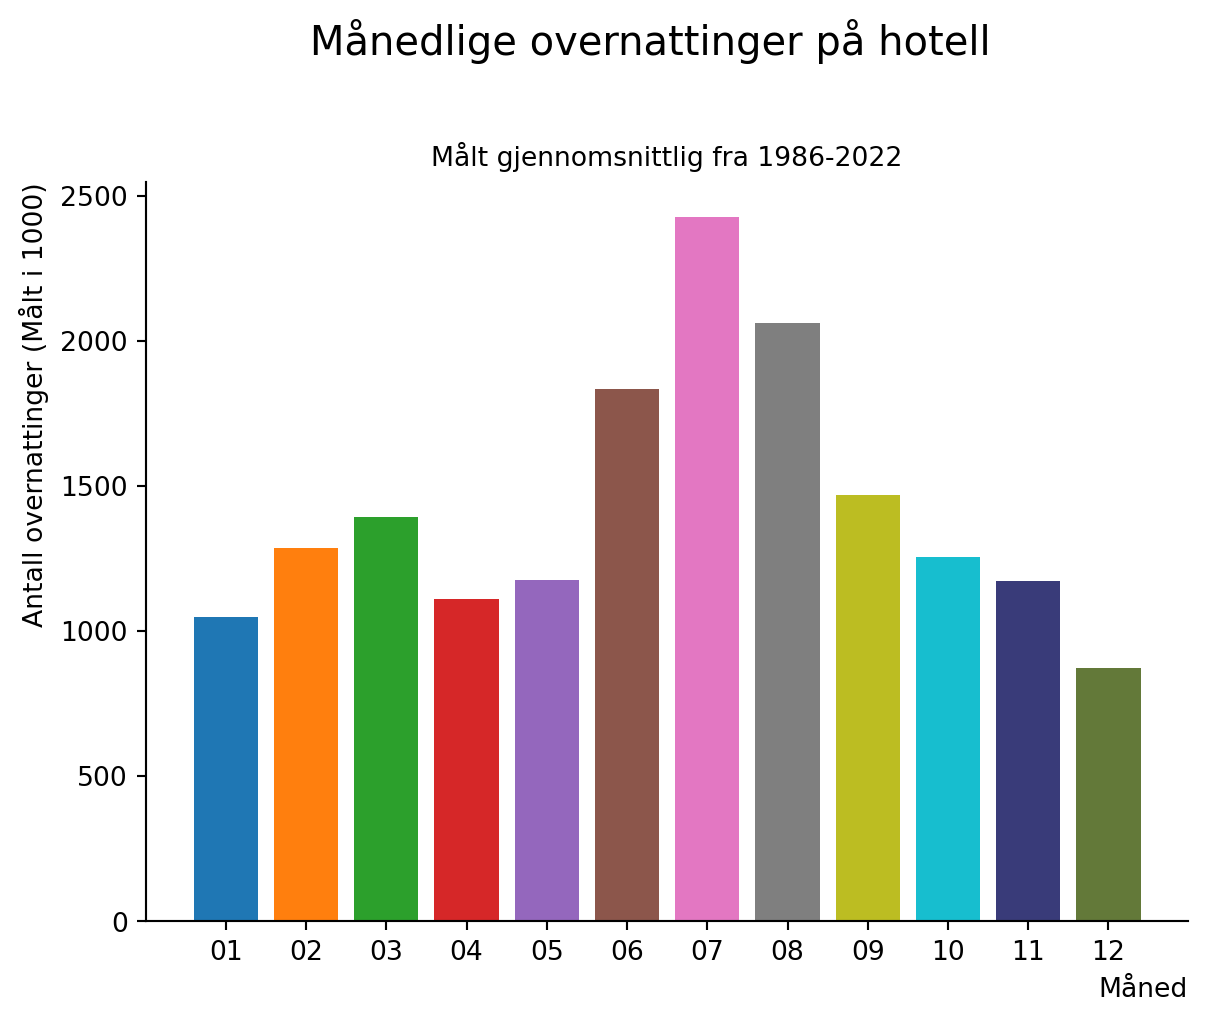

In [2]:
#Lager en ny dataframe som tar verdien på måneden og finner gjennomsnittet
df_monthly = df.groupby(['month'])['value'].mean()

#Resetter posisjonen på indeksen
df_monthly = df_monthly.reset_index()

#Lager graf
def create_ax2(): 
    fig, ax = plt.subplots()
    ax.set_ylabel('Antall overnattinger (Målt i 1000)', loc='top')
    ax.set_xlabel('Måned', loc='right')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    return fig, ax


fig2, ax = create_ax2()

#Plotter grafen
plt.ticklabel_format(style = 'plain')
plt.suptitle('Månedlige overnattinger på hotell', color='black', y=1.05, fontsize=15)
plt.title('Målt gjennomsnittlig fra 1986-2022', fontsize=10)
ax.bar(df_monthly["month"], df_monthly["value"]/1000, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
'#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#393b79', '#637939'])
fig.canvas.draw_idle()


Ved å måle gjennomsnittet for antall overnattinger per måned for perioden 1986-2022 er det ingen tvil om at sommermånedene er da folk flest er ute å reiser, med en topp på nesten 2,4 millioner overnattinger troner juli måned høyest. Det er ikke uforventet da fellesferien er i juli og det er oftest da man har tid til å reise.

##### 2.3 - Hva er fordelingen av turister som ankommer via skip (cruise) og med fly, og evt andre fremkostmidler?


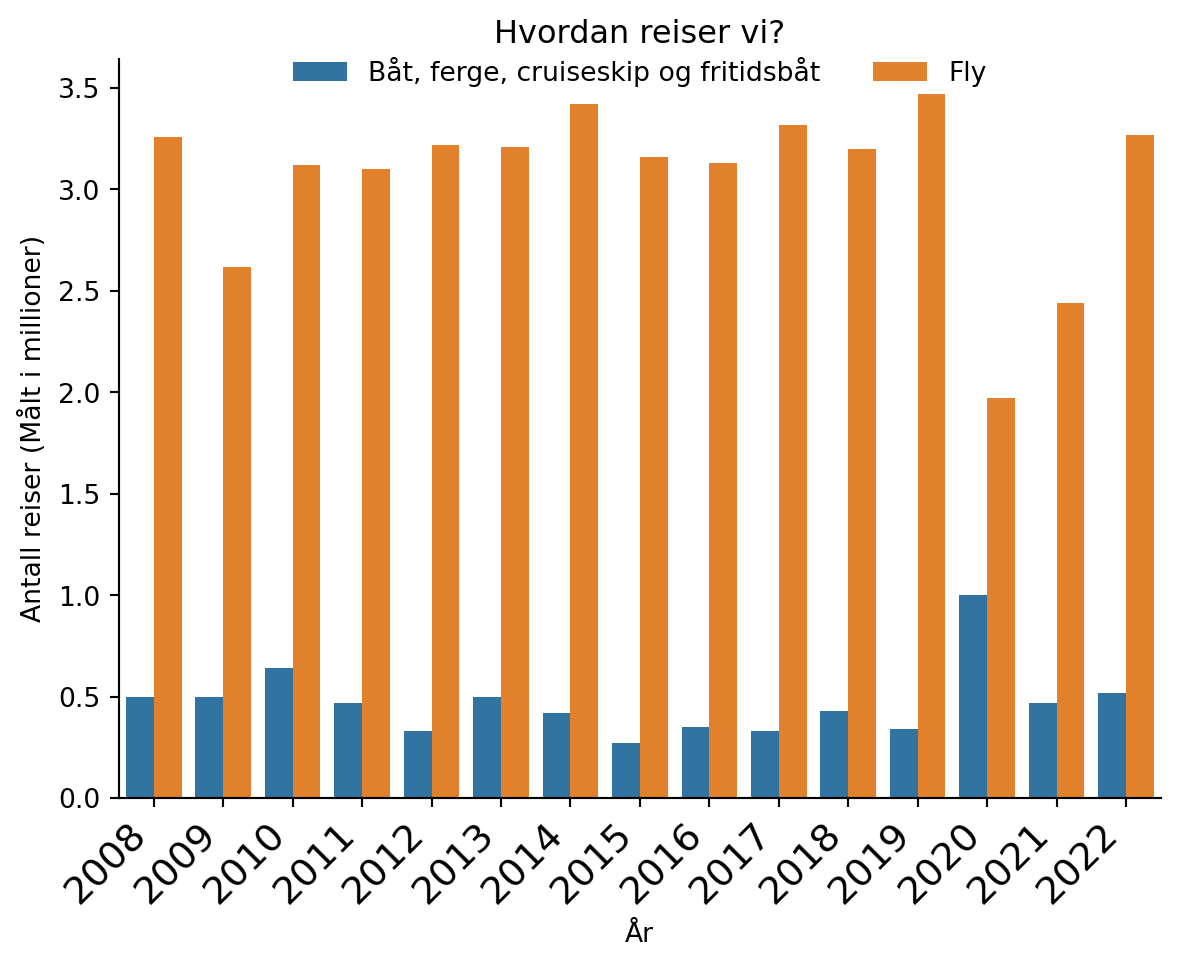

In [3]:
#Henter URL
postUrl = "https://data.ssb.no/api/v0/no/table/06921/"

#Query
apiQuery = {
  "query": [
    {
      "code": "TransportA",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Reisetype",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

#Lager et datasett fra query
def apiToDataframe(postUrl, query): 
  res = requests.post(postUrl, json=query)
  ds = pyjstat.Dataset.read(res.text)
  df = ds.write('dataframe')
  df_id = ds.write('dataframe', naming='id')
  return df, df_id, ds

df_reise, df_reise_id, ds = apiToDataframe(postUrl, apiQuery)

#Lager en ny variabel for år
df_reise[['year']] = df_reise['kvartal'].str.split('M', expand=True)

#Legger sammen hvert kvartal for å få en verdi for et helt år
df_reise['year'] = df_reise['kvartal'].str[:4]

#Lager et nytt dataframe som inneholder verdi for hvert år for hvilken transportmåte som blir brukt
df_reise_ferdig = df_reise.groupby(['year', 'transportmåte'])['value'].agg('sum').reset_index()

#Lager grafen
def create_ax3(): 
    fig, ax = plt.subplots()
    ax.set_ylabel('Antall reiser (målt i millioner)', loc='top')
    ax.set_xlabel('Transportmåte', loc='right')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    return fig, ax

fig3, ax = create_ax3()

#Plotter grafen
sns.barplot(data=df_reise_ferdig, x='year', y='value', hue='transportmåte').set(title='Hvordan reiser vi?')
ax.set(xlabel='År', ylabel='Antall reiser (Målt i millioner)')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, .93), ncol=3, title=None, frameon=False)
fig.canvas.draw_idle()

Ved å bruke en måling gjort fra 2008-2022 kan vi se hvilket fremkostmiddel som blir brukt i høyest grad blant oss. Grafen viser antall millioner reiser gjort hvert, vi ser tydelig at fly er den desidert mest brukte måten å reise med. Nesten fem ganger så mange reiser med fly som med båt, ferge, cruise og fritidsbåter.


##### 2.4 - Hvordan er hotelløkonomien? 


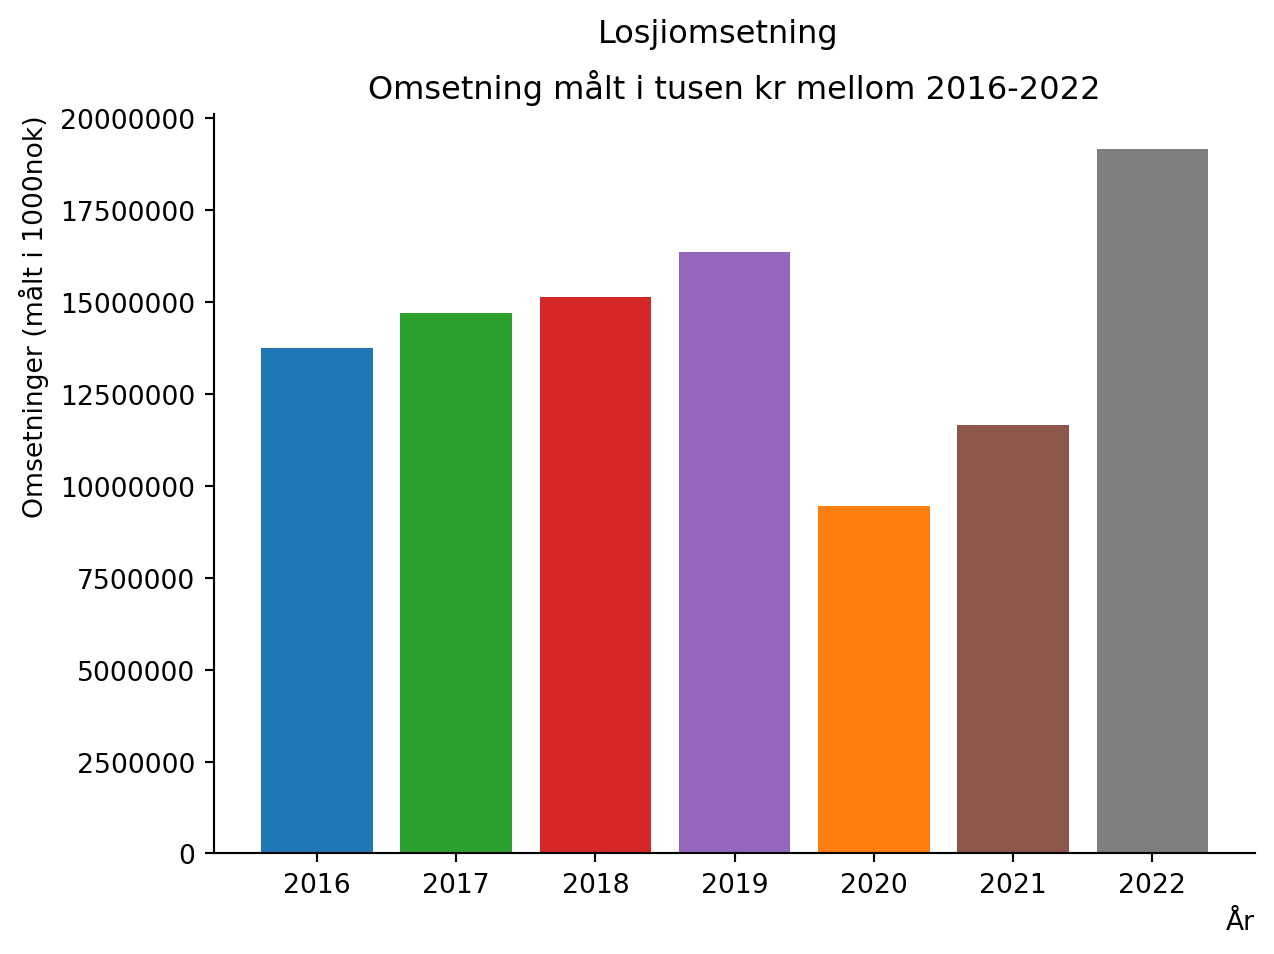

In [4]:
#Henter URL
postUrl = "https://data.ssb.no/api/v0/no/table/13156/"

#Query
apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:LandetNyn",
        "values": [
          "0N"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "LosjiOms"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

#Lager datasett av query
def apiToDataframe(postUrl, query): 
  res = requests.post(postUrl, json=query)
  ds = pyjstat.Dataset.read(res.text)
  df = ds.write('dataframe')
  df_id = ds.write('dataframe', naming='id')
  return df, df_id, ds

df_hotell, df_hotell_id, ds = apiToDataframe(postUrl, apiQuery)

#Lager en variabel for årlig måling
df_hotell[['year', 'month']] = df_hotell['måned'].str.split('M', expand=True)

#Grupperer verdien til en årlig sum
df_hotell = df_hotell.groupby(df_hotell['year']).agg({'value':'sum'})

#Resetter posisjon til indeks
df_hotell = df_hotell.reset_index()

#Gjør det om til numerisk verdi
df_hotell['year'] = pd.to_numeric(df_hotell['year'])

#Separer ut alt fra 2023
df_hotell = df_hotell[df_hotell['year'] != 2023]

#Lager graf
def create_ax4():
  fig, ax = plt.subplots()
  ax.set_ylabel('Omsetninger (målt i 1000nok)', loc='top')
  ax.set_xlabel('År', loc='right')
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')
  return fig, ax

fig4, ax = create_ax4()

#Plotter graf
plt.xticks()
plt.ticklabel_format(style = 'plain')
plt.suptitle('Losjiomsetning')
plt.title('Omsetning målt i tusen kr mellom 2016-2022', color='Black')
ax.bar(df_hotell["year"], df_hotell["value"], label= "månedsbasert endring", 
color=['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#8c564b', '#7f7f7f'])
plt.show()

Her har jeg brukt måltallet "losjiomsetning per disponible rom" for å se på hvordan hotelløkonomien har vært fra 2016-2022. Det har vært en relativt god vekst på inntekten til hotellene fram til koronaårene 2020 og 2021, da hotellkjedene som med så mye annet fikk et brått fall i økonomien. Det har etter den tid tatt seg betraktelig opp igjen, men økningen i inntekter skyldes ikke at hotellene har booket flere rom nå, enn før pandemien i følge __[E24.no](https://e24.no/naeringsliv/i/7dbA4w/hotellprisene-stiger)__. Derimot er en betydelig økning i pris grunnen til at inntekten til de norske hotellene har tatt seg opp. Hotellene i Oslo har en prisvekst på hotellrom på 16,6 prosent fra første halvår 2019 og hele 60,8 prosent fra første halvår i fjor. Rombelegget i Oslo er derimot 17,4 prosent lavere enn i første halvår 2019.

<p>&nbsp;</p>

### Kapittel 3 - Samfunnsøkonomiske effekter av en turistskatt


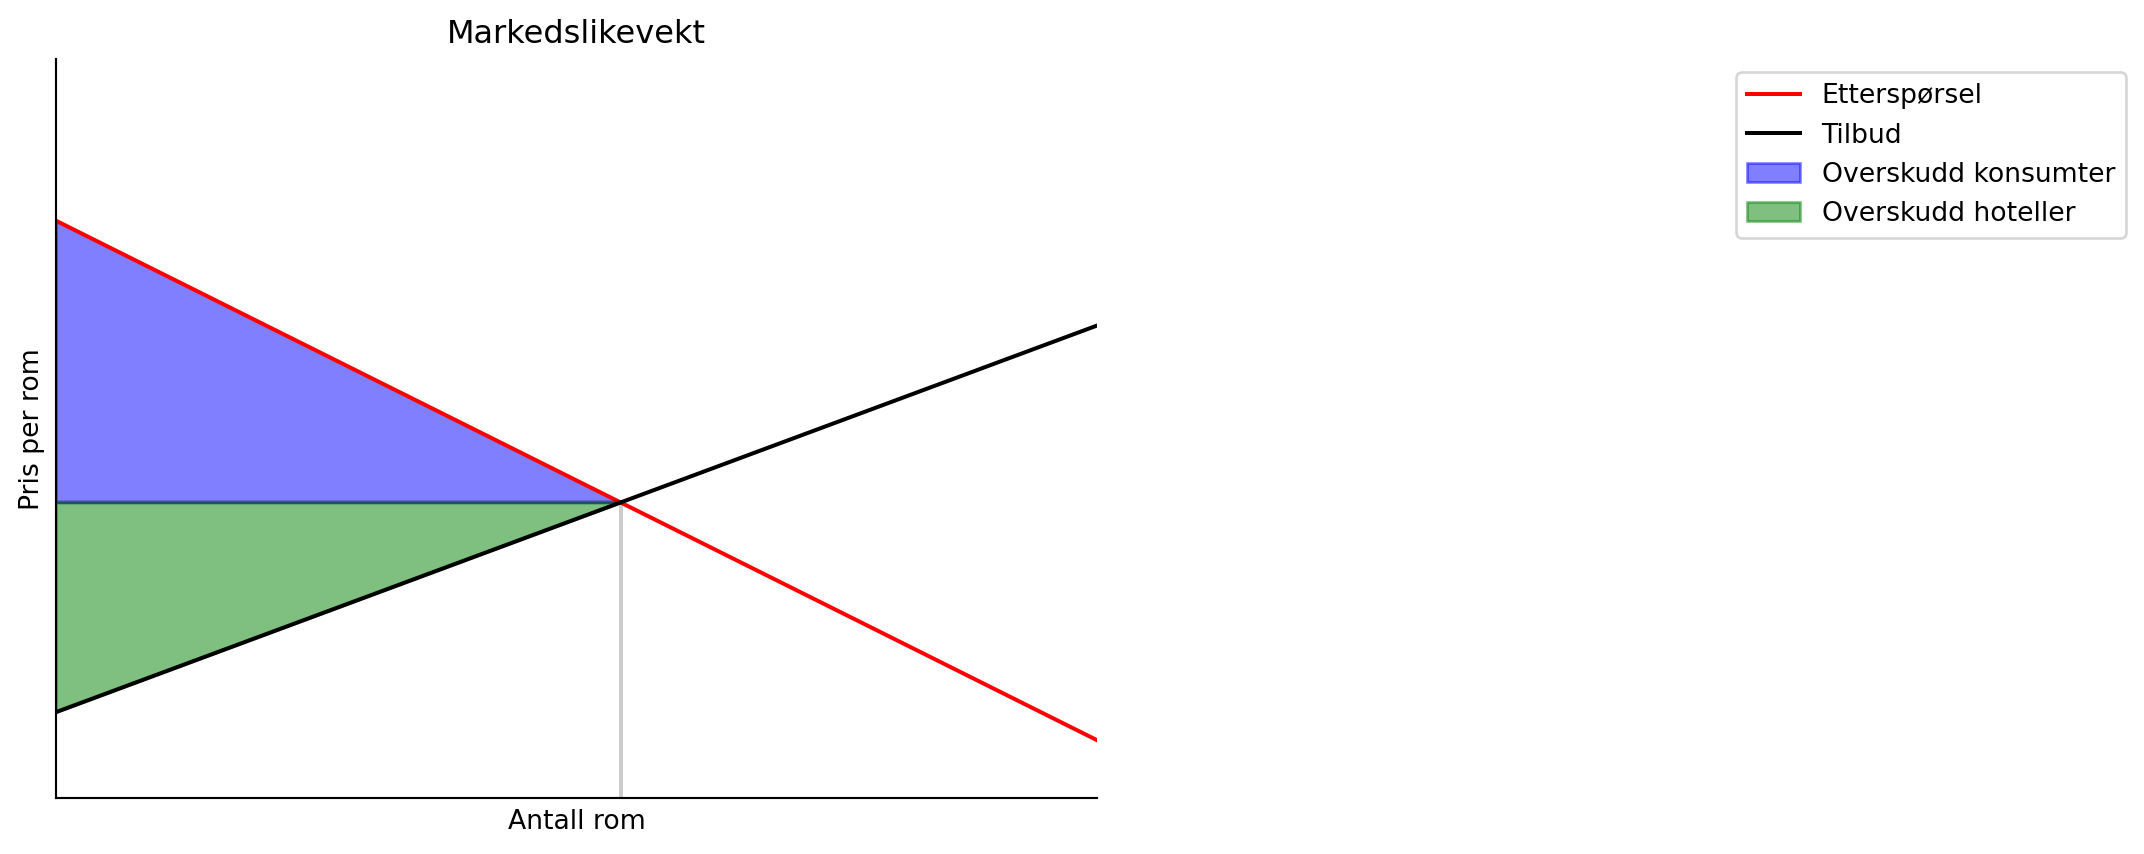

In [5]:
x, p, t=sp.symbols('x p t', real=True, positive=True)

def supply(x, t):
    return ((100+x)/4.3) + t
def demand(x):
    return (500-x)/3.2

ligning=sp.Eq(demand(x),supply(x, t))
x_eq=sp.solve(ligning, x)
x_eq = x_eq[0]
likevekt_eq=demand(x_eq)
produsent_O = sp.integrate(likevekt_eq-supply(x, t),(x,0,x_eq))
konsument_O = sp.integrate(demand(x)-likevekt_eq,(x,0,x_eq))
avgiftsproveny = sp.integrate(t, (x, 0, x_eq)) 

x_num=np.linspace(0.1,500,100)

ligningt0 = sp.Eq(demand(x),supply(x, 0))
eq_t0 = sp.solve(ligningt0,x)
eq_t0 = float(eq_t0[0])
eq_t01=demand(eq_t0)

def create_ax5():
    fig, ax = plt.subplots()
    ax.set_ylabel('Pris per rom', loc='center')
    ax.set_xlabel('Antall rom', loc='center')
    ax.set(xlim=(0,450))
    ax.set(ylim=(0,200))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    
    return fig, ax

fig5, ax = create_ax5()


ax.plot(x_num, demand(x_num), label='Etterspørsel', color='red')
ax.plot(x_num, supply(x_num, 0), label='Tilbud', color='black')
ax.set_title('Markedslikevekt')

line = np.linspace(0,eq_t0,100)


ax.vlines(eq_t0,0,demand(eq_t0), color='black', alpha=0.2)
ax.hlines(eq_t01,0,eq_t0, color='black', alpha=0.2)
ax.fill_between(line,eq_t01,demand(line), color = "blue",alpha = 0.5,label='Overskudd konsumter')
ax.fill_between(line,supply(line, 0),eq_t01, color = "green",alpha = 0.5,label='Overskudd hoteller')
ax.legend(bbox_to_anchor=(2,1))
plt.xticks([])
plt.yticks([])
plt.show()

Her er et eksempel på hvordan en markedslikevekten for konsumenter og hoteller ville sett ut dersom det ikke fantes en turistskatt. 

<p>&nbsp;</p>


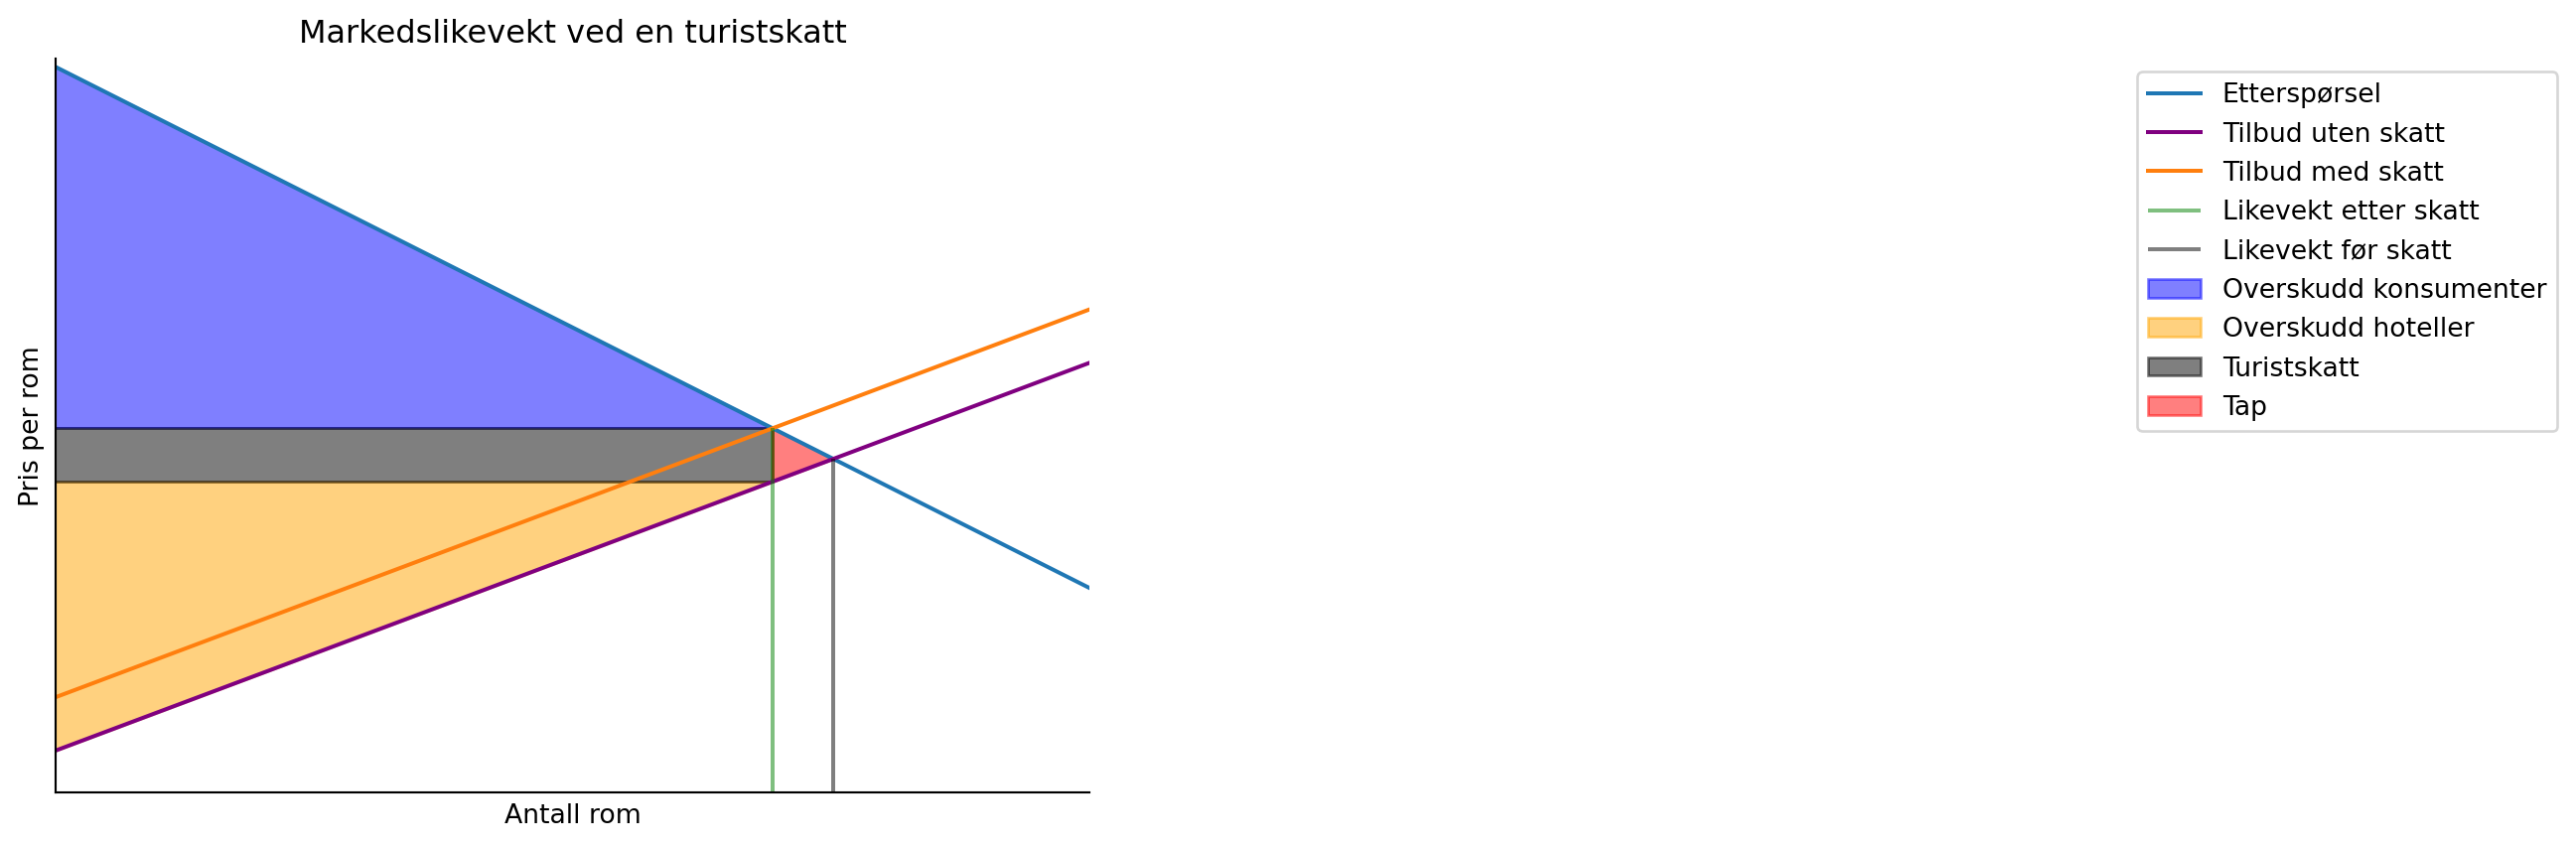

In [6]:
x_num=np.linspace(0.1,500,100)
ligning_4 = sp.Eq(demand(x),supply(x, 4))

ligningt4 = sp.solve(ligning_4,x)
ligningt4 = float(ligningt4[0])
ligning_t4=demand(ligningt4)

def create_ax6():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per rom', loc='center')
                ax.set_xlabel('Antall rom', loc='center')
                ax.set(xlim=(150,275))
                ax.set(ylim=(55,110))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig6, ax = create_ax6()
ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num, 0), label='Tilbud uten skatt', color='purple')
ax.plot(x_num, supply(x_num, 4), label='Tilbud med skatt')
ax.set_title('Markedslikevekt ved en turistskatt')

line2 = np.linspace(0,ligningt4,100)
line3 = np.linspace(eq_t0,ligningt4,100)

ax.vlines(ligningt4,51,demand(ligningt4), color='green', alpha= 0.5, label='Likevekt etter skatt') 
ax.vlines(eq_t0,51,demand(eq_t0), color='black', alpha= 0.5, label='Likevekt før skatt')
ax.fill_between(line2,ligning_t4,demand(line2), color = "blue",alpha = 0.5,label='Overskudd konsumenter')
ax.fill_between(line2,supply(line2, 0),ligning_t4-4, color = "orange",alpha = 0.5,label='Overskudd hoteller')
ax.fill_between(line2,ligning_t4,ligning_t4-4, color = "black",alpha = 0.5,label='Turistskatt')
ax.fill_between(line3,supply(line3, 0),demand(line3), color = "red",alpha = 0.5,label='Tap')
ax.legend(bbox_to_anchor=(2,1))
plt.yticks([])
plt.xticks([])
plt.show()

Her er et eksempel på hvordan en turistskatt vil påvirke konsumenten og hotellene, størrelsen på turistskatten vil avhenge av hvor du er. Formålet er å bidra til å finansiere turistinfrastrukturen. Effekten av en turistskatt kan være flere, både positive og negative. 

En turistskatt skal være med på å bidra til infrastrukturen, opprettholde reiselivsfasiliteter og beskytte naturresurser. Den kan være med på å bidra til å redusere de negative effektene høy turisme bidrar til ved å skape mer bærekraftige reisevaner. Ved høy turisme kan det være lurt å inngå en turistskatt slik at man får det mer kontrollert, både for å beskytte plassen og ta vare på de som bor der fra før. 

Redusert turiststrøm som følge av en turistskatt kan også ha motsatt effekt, det kan bli dyrere å reise dit og i verste fall la være å dra dit. Det vil gå direkte ut over lokalbefolkningen som mange steder lever av en turiststrøm. Matbutikker, klesbutikker, kafeer og uteliv vil få en økonomisk påkjenning da det blir mindre penger i omløp.

<p>&nbsp;</p>

### Konklusjon

Ut i fra mine analyser vil jeg si at en turistskatt er en positiv tilvekst for samfunnet. Det er i all hovedsak ikke en dyr avgift, men en viktig avgift som bidrar til et mer bærekraftig reiseliv både for besøkende og beboere. Den må tilpasses plassen, turiststrømmen og må gå utelukket til å noe som kommer lokalsamfunnet til gode. Tilrettelegging, bygging og drift av toaletter, avfallshåndtering, parkeringsplasser og sikkerhet må være bærebjelkene for å ikke bare få nye turister, men også returnerende turister til å ville reise hit igjen. 

Jeg anbefaler alle, men i hovedsak byer som har turisme til å innføre en turistskatt. Den må tilrettelegges for hver by sitt behov når det kommer til å opprettholde miljøet og de fasilitetene som er. Vi blir ikke kvitt turismen, og det her ikke noe vi burde prøve på heller, istedet må vi ta nytte av den og bruke det på å skape et bærkraftig samfunn som vi alle kan dra nytte av. Overturisme er ikke et problem, men en mulighet.

<p>&nbsp;</p>

### Kildeliste

[NHO Reiseliv u.å.] Bjørndal, Ole M (u.å.) Turistskatt. https://www.nhoreiseliv.no/vi-mener/barekraftig-reiseliv/turistskatt/. Lest: 10.03.2023

[Reiseliv (2022, 15. juli)] Henriksen, P. (2022, 15. juli). Turistskatt kreves i mange land verden over. (https://www.reiseliv.no/reiseokonomi/turistskatt-kreves-i-mange-land-verden-over/) Lest: 18.03.2023

Statistisk sentralbyrå. (2023, 28. februar). Overnattingar. SSB.no. (https://www.ssb.no/statbank/table/08403/) Lest: 12.03.203

Statistisk sentralbyrå. (2023, 24. februar ). Reiseundersøkelse. SSB.no. (https://www.ssb.no/statbank/table/06921) Lest: 

Statistisk sentralbyrå. (2023, 28. februar). Overnattingar. SSB.no. (https://www.ssb.no/statbank/table/13156/) Lest: 17.03.2023

NTB. (2022, 28. juli). Hotellprisene stiger. E24.no. (https://e24.no/naeringsliv/i/7dbA4w/hotellprisene-stiger) Lest: 17.03.2023

Røsvik, H. K. (2017, 4. august). Turistskatt og natur og miljø. Svalbardposten.no (https://www.svalbardposten.no/leder-svalbards-miljovernfond-turistskatt/turistskatt-og-natur-og-miljo/160284?fbclid=IwAR0bmOlbc8cSYzIGCO3NPOVUVW6-1i1MTW6KxY2X3B_ok6GQL-WhwwzccTA) Lest: 11.03.2023

NTB. (2019, 16. mai). Amsterdam innfører ny turistskatt. E24.no. (https://e24.no/privatoekonomi/i/50WO0O/amsterdam-innfoerer-ny-turistskatt) Lest: 12.03.2023
